# Import data

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('ggplot')


In [2]:
import matplotlib 
matplotlib.__version__

'3.5.1'

In [3]:
# pip install --user matplotlib --upgrade

In [4]:
df=pd.read_csv('AviationData.csv', parse_dates=['Event.Date'], encoding='iso-8859-1', low_memory=False)

In [5]:
df.shape

(87282, 31)

In [6]:
pd.options.display.max_columns=None
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
# correct the time
df.loc[87281,'Event.Date']='2021-12-08'

In [8]:
# check if it has duplicated rows
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87282 non-null  object        
 1   Investigation.Type      87282 non-null  object        
 2   Accident.Number         87282 non-null  object        
 3   Event.Date              87282 non-null  datetime64[ns]
 4   Location                87230 non-null  object        
 5   Country                 87056 non-null  object        
 6   Latitude                33073 non-null  object        
 7   Longitude               33064 non-null  object        
 8   Airport.Code            49322 non-null  object        
 9   Airport.Name            51955 non-null  object        
 10  Injury.Severity         86399 non-null  object        
 11  Aircraft.damage         84272 non-null  object        
 12  Aircraft.Category       30783 non-null  object

In [10]:
# calculate null percentage for each column
Na_percentage=df.isna().sum()/df.shape[0]
Na_percentage

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.000596
Country                   0.002589
Latitude                  0.621079
Longitude                 0.621182
Airport.Code              0.434912
Airport.Name              0.404746
Injury.Severity           0.010117
Aircraft.damage           0.034486
Aircraft.Category         0.647316
Registration.Number       0.015089
Make                      0.000722
Model                     0.001054
Amateur.Built             0.001169
Number.of.Engines         0.065867
Engine.Type               0.067494
FAR.Description           0.651039
Schedule                  0.858734
Purpose.of.flight         0.066325
Air.carrier               0.817018
Total.Fatal.Injuries      0.130623
Total.Serious.Injuries    0.143329
Total.Minor.Injuries      0.136718
Total.Uninjured           0.067734
Weather.Condition         0.045576
Broad.phase.of.fligh

# Data cleaning

In [11]:
# remove columns that contain over 40% null values
df.drop(columns=Na_percentage[Na_percentage>0.4].index, inplace=True)

In [12]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# delete country is not USA
df=df[df['Country']=='United States']

In [14]:
# deleten unused columns
df.drop(columns=['Aircraft.damage','Registration.Number', 'Make', 'Model','Report.Status','Publication.Date','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured', 'Total.Fatal.Injuries'], inplace=True)

In [15]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),No,1.0,Reciprocating,Personal,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),No,1.0,Reciprocating,Personal,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),No,1.0,Reciprocating,Personal,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),No,1.0,Reciprocating,Personal,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),No,NaN,NaN,Personal,VMC,Approach


In [16]:
# separate location 
df['State']=df['Location'].str.split(pat=',',expand=True)[1]
df['Location']=df['Location'].str.split(pat=',',expand=True)[0].str.title()


In [17]:
# change 'Amateur.Built' to yes or no
df['Amateur.Built'].unique()

array(['No', 'Yes', nan, 'Y', 'N'], dtype=object)

In [18]:
df['Amateur.Built'].value_counts()

No     55770
N      17005
Yes     5564
Y       2638
Name: Amateur.Built, dtype: int64

In [19]:
df['Amateur.Built'].str.contains('N.?')

0        True
1        True
2        True
3        True
4        True
         ... 
87275    True
87277    True
87278    True
87279    True
87280    True
Name: Amateur.Built, Length: 80998, dtype: object

In [20]:
df['Amateur.Built'].str.contains('Y.?').sum()

8202

In [21]:
df.loc[df['Amateur.Built'].str.contains('N.?')==True,'Amateur.Built']='False'
df.loc[df['Amateur.Built'].str.contains('Y.?')==True,'Amateur.Built']='True'
# use 'replace' method could be a better way

In [22]:
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,Moose Creek,United States,Fatal(2),False,1.0,Reciprocating,Personal,UNK,Cruise,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,Bridgeport,United States,Fatal(4),False,1.0,Reciprocating,Personal,UNK,Unknown,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Saltville,United States,Fatal(3),False,1.0,Reciprocating,Personal,IMC,Cruise,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Eureka,United States,Fatal(2),False,1.0,Reciprocating,Personal,IMC,Cruise,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Canton,United States,Fatal(1),False,NaN,NaN,Personal,VMC,Approach,OH


In [23]:
# modify 'Injury.Severity'
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(70)',
       'Fatal(9)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(25)',
       'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)',
       'Fatal(111)', 'Fatal(20)', 'Fatal(73)', 'Fatal(34)', 'Fatal(27)',
       'Fatal(16)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)',
       'Fatal(110)', 'Fatal(230)', 'Fatal(29)', 'Fatal(228)', 'Fatal(88)',
       'Fatal(19)', 'Fatal(44)', 'Fatal(64)', 'Fatal(65)', 'Fatal(92)',
       'Fatal(265)', 'Fatal(21)', 'Fatal(49)', 'Fatal', nan], dtype=object)

In [24]:
df['Injury.Severity']=df['Injury.Severity'].str.split(pat='(').str[0]

In [25]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,Moose Creek,United States,Fatal,False,1.0,Reciprocating,Personal,UNK,Cruise,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,Bridgeport,United States,Fatal,False,1.0,Reciprocating,Personal,UNK,Unknown,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Saltville,United States,Fatal,False,1.0,Reciprocating,Personal,IMC,Cruise,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Eureka,United States,Fatal,False,1.0,Reciprocating,Personal,IMC,Cruise,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Canton,United States,Fatal,False,NaN,NaN,Personal,VMC,Approach,OH


In [26]:
# parse date to year, month, and day
df['Year']=df['Event.Date'].dt.year

In [27]:
df['Month']=df['Event.Date'].dt.month_name().str[0:3]

In [28]:
df['Day']=df['Event.Date'].dt.day_name()

In [29]:
# modify 'Weather.Condition' change 'UNK' to 'Unknown'
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [30]:
df['Weather.Condition'].replace(regex=r'U.{2}',value='Unknown',inplace=True)

In [31]:
df=df.convert_dtypes()

In [32]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,State,Year,Month,Day
0,20001218X45444,Accident,SEA87LA080,1948-10-24,Moose Creek,United States,Fatal,False,1,Reciprocating,Personal,Unknown,Cruise,ID,1948,Oct,Sunday
1,20001218X45447,Accident,LAX94LA336,1962-07-19,Bridgeport,United States,Fatal,False,1,Reciprocating,Personal,Unknown,Unknown,CA,1962,Jul,Thursday
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Saltville,United States,Fatal,False,1,Reciprocating,Personal,IMC,Cruise,VA,1974,Aug,Friday
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Eureka,United States,Fatal,False,1,Reciprocating,Personal,IMC,Cruise,CA,1977,Jun,Sunday
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Canton,United States,Fatal,False,<NA>,<NA>,Personal,VMC,Approach,OH,1979,Aug,Thursday


In [181]:
df['Broad.phase.of.flight'].unique()

<StringArray>
[     'Cruise',     'Unknown',    'Approach',       'Climb',     'Takeoff',
     'Landing',        'Taxi',     'Descent', 'Maneuvering',    'Standing',
   'Go-around',       'Other',          <NA>]
Length: 13, dtype: string

# Data Analysis

## Observation 1: 
The number of accidents including Fatal and Non-fatal accidents decreases with year, while the number of incident keeps almost unchanged during 1982 and 2007 and is reduced to 0 afterwards. Moreover, non-fatal accidents take major proportion in all of incidents and accidents, which is over 80%, while the fatal rate is below 20%.

In [34]:
# # Number of total accidents+incidents per year
# df_MumperYear=df.groupby(by='Year').count()['Event.Id']
# # Number of Fatal accidents per year
# df_FatalperYear=df[df['Injury.Severity']=='Fatal'].groupby(by='Year').count()['Event.Id']
# # Number of non-Fatal accidents per year
# df_NonFatalperYear=df[df['Injury.Severity']=='Non-Fatal'].groupby(by='Year').count()['Event.Id']
# # Number of Fatal accidents per year
# df_IncidentperYear=df[df['Injury.Severity']=='Incident'].groupby(by='Year').count()['Event.Id']

# # plot
# plt.figure(figsize=(10,6))
# plot=sns.lineplot(data=df_MumperYear, marker='v')
# plot=sns.lineplot(data=df_FatalperYear, marker='*')
# plot=sns.lineplot(data=df_NonFatalperYear, marker='s')
# plot=sns.lineplot(data=df_IncidentperYear, marker='o')
# plt.xlabel('Year')
# plt.title('Number of aviation accidents/incidents per year')
# #plot.set(xlabel='Year', title = 'Number of aviation accidents/incidents per year')
# plt.legend(['Total','Accident: Fatal','Accident: Non-Fatal','Incident'])
# plt.xlim([1982,2021])

(1982.0, 2021.0)

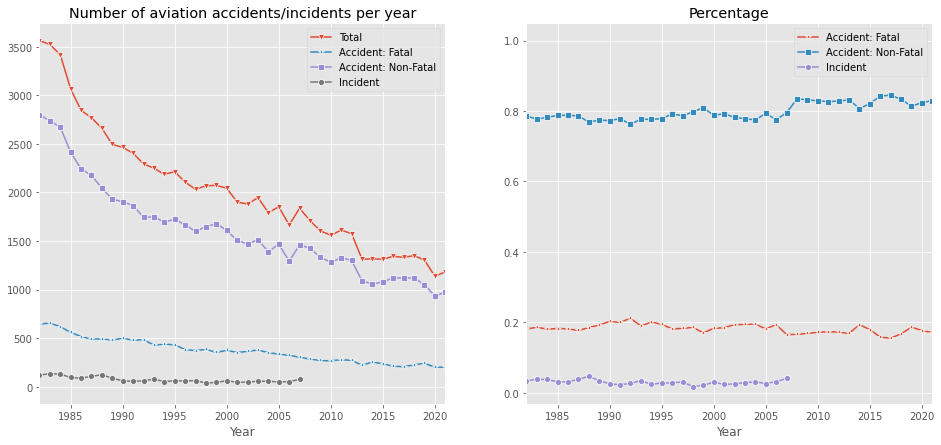

In [35]:
## plot number of accidents+incidents
# Number of total accidents+incidents per year
df_MumperYear=df.groupby(by='Year').count()['Event.Id']
# Number of Fatal accidents per year
df_FatalperYear=df[df['Injury.Severity']=='Fatal'].groupby(by='Year').count()['Event.Id']
# Number of non-Fatal accidents per year
df_NonFatalperYear=df[df['Injury.Severity']=='Non-Fatal'].groupby(by='Year').count()['Event.Id']
# Number of Fatal accidents per year
df_IncidentperYear=df[df['Injury.Severity']=='Incident'].groupby(by='Year').count()['Event.Id']

fig, axs=plt.subplots(1,2, figsize=(16,7))
sns.lineplot(ax=axs[0],data=df_MumperYear, marker='v')
sns.lineplot(ax=axs[0],data=df_FatalperYear, marker='*')
sns.lineplot(ax=axs[0],data=df_NonFatalperYear, marker='s')
sns.lineplot(ax=axs[0],data=df_IncidentperYear, marker='o')
axs[0].set_xlabel('Year')
axs[0].set_title('Number of aviation accidents/incidents per year')
#plot.set(xlabel='Year', title = 'Number of aviation accidents/incidents per year')
axs[0].legend(['Total','Accident: Fatal','Accident: Non-Fatal','Incident'])
axs[0].set_xlim([1982,2021])

##  plot percentages of accidents+incidents
# Number of total accidents+incidents per year (remove nan and unavailable values first)
df_MumperYear=df[~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))].groupby(by='Year').count()['Event.Id']
# Number of Fatal accidents per year
df_FatalperYear=df[df['Injury.Severity']=='Fatal'].groupby(by='Year').count()['Event.Id']/df_MumperYear
# Number of non-Fatal accidents per year
df_NonFatalperYear=df[df['Injury.Severity']=='Non-Fatal'].groupby(by='Year').count()['Event.Id']/df_MumperYear
# Number of Fatal accidents per year
df_IncidentperYear=df[df['Injury.Severity']=='Incident'].groupby(by='Year').count()['Event.Id']/df_MumperYear

#sns.lineplot(ax=axs[1],data=df_MumperYear./len(df), marker='v')
sns.lineplot(ax=axs[1],data=df_FatalperYear, marker='*')
sns.lineplot(ax=axs[1],data=df_NonFatalperYear, marker='s')
sns.lineplot(ax=axs[1],data=df_IncidentperYear, marker='o')
axs[1].set_xlabel('Year')
axs[1].set_title('Percentage')
#plot.set(xlabel='Year', title = 'Percentage')
axs[1].legend(['Accident: Fatal','Accident: Non-Fatal','Incident'])
axs[1].set_xlim([1982,2021])

In [231]:
# S=df[~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))].groupby(by='Year')['Injury.Severity'].value_counts(normalize=True).unstack('Injury.Severity').fillna(0)
# plt.plot(S.index, S.Fatal,'*-',S.index, S['Non-Fatal'],'s-')
# plt.xlim([1982,2021])

## Observation 2: 
In the last 30 years, CA, FL, and TX are the top 3 states that had the most fatal accidents, which are all over 1000.

Text(0.5, 1.0, 'Number of Fatal Accidents over States (Top 10)')

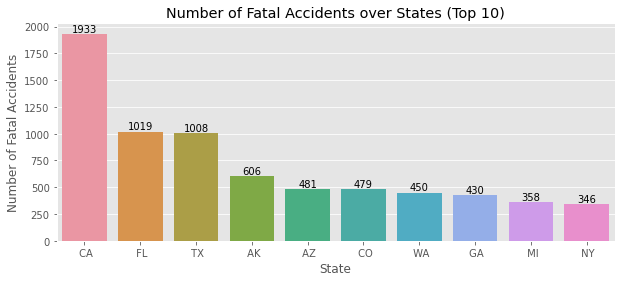

In [285]:
## Fatal accidents over top 10 states

# Number of Fatal accidents per state
df_FatalperState=df[df['Injury.Severity']=='Fatal'].groupby(by='State').count()['Event.Id'].sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(10,4))
ax=sns.barplot(x=df_FatalperState.index,y=df_FatalperState.values)  #
#ax=df_FatalperState.plot.bar(rot=1)
#plt.bar(df_FatalperState.index,df_FatalperState.values)
ax.bar_label(ax.containers[0])
plt.ylabel('Number of Fatal Accidents')
plt.title('Number of Fatal Accidents over States (Top 10)')


## Observation 3: 
It is observed that more fatal accidents happened in the 3rd quarter of a year and Flying on weekends is more likely to have fatal accidents than other days. The main reason is that more flights are introduced on weekend and in months like July, therefore more accidents occured. More importantly, the proportion of 'Personal' flights is increased, whose fatal rate (20.3%) is higher than the average (Average is below 20%).

Text(0.5, 1.0, 'Number of Fatal Accidents over Days')

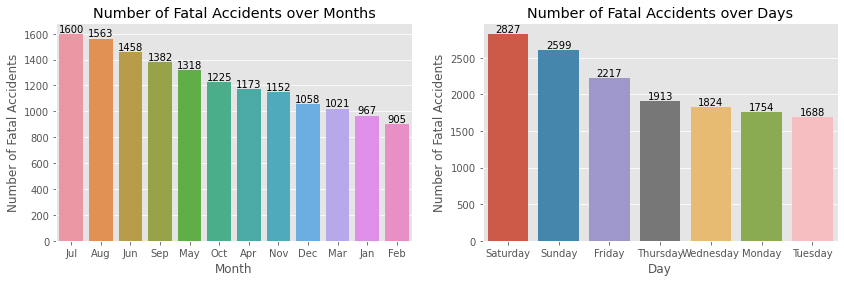

In [276]:
## Fatal accidents over months and days

df_FataloverMonth=df[df['Injury.Severity']=='Fatal'].groupby('Month').count()['Injury.Severity'].sort_values(ascending=False)
df_FataloverDay=df[df['Injury.Severity']=='Fatal'].groupby('Day').count()['Injury.Severity'].sort_values(ascending=False)

# plot
fig, axs =plt.subplots(1,2, figsize=(14,4))

p1=sns.barplot(ax=axs[0], x=df_FataloverMonth.index, y=df_FataloverMonth.values)
axs[0].bar_label(axs[0].containers[0])
#axs[0].bar_label(p1.containers[0])
axs[0].set_ylabel('Number of Fatal Accidents')
axs[0].set_title('Number of Fatal Accidents over Months')

sns.barplot(ax=axs[1], x=df_FataloverDay.index, y=df_FataloverDay.values)
axs[1].bar_label(axs[1].containers[0])
axs[1].set_ylabel('Number of Fatal Accidents')
axs[1].set_title('Number of Fatal Accidents over Days')

In [90]:
# check the top 3 'Purpose.of.flight' on Sat
df[df['Day']=='Saturday'].groupby('Purpose.of.flight').count()['Day'].sort_values(ascending=False).head(3)

Purpose.of.flight
Personal         10475
Instructional     1829
Unknown            852
Name: Day, dtype: int64

In [83]:
# check the top 3 'Purpose.of.flight' in Jul
df[df['Month']=='Jul'].groupby('Purpose.of.flight').count()['Day'].sort_values(ascending=False).head(3)

Purpose.of.flight
Personal              5872
Instructional         1089
Aerial Application    1011
Name: Day, dtype: int64

In [89]:
# check Fatal rate when 'Purpose.of.flight' is Personal
Total_acc=df[(df['Purpose.of.flight']=='Personal')&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))]['Injury.Severity'].count()
df[(df['Purpose.of.flight']=='Personal')&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))].groupby('Injury.Severity').count()['Day'].sort_values(ascending=False)/Total_acc

Injury.Severity
Non-Fatal    0.793080
Fatal        0.203171
Incident     0.003749
Name: Day, dtype: float64

## Observation 4:
We see that non-amateur-built planes are significantly safer than the amateur-built ones. When the plane is built by amateur, its fatality rate in accidents is as high as 27.2%, compared to 17.3% by non-amateur

In [108]:
# df[(df['Amateur.Built'].notna())&(~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable')))].count()['Injury.Severity']

In [110]:
## Fatality accidents'relations with Amateur.Built
# Fatality rate when Non Amateur built
Total_FatalinNonAmateur=df[(df['Amateur.Built']=='False')&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))]['Injury.Severity'].count()
FatalRate_inNonAmateur=df[(df['Amateur.Built']=='False')&(df['Injury.Severity']=='Fatal')]['Injury.Severity'].count()/Total_FatalinNonAmateur
FatalRate_inNonAmateur

0.17320526757578678

In [112]:
# Fatality rate when Amateur built
Total_FatalinAmateur=df[(df['Amateur.Built']=='True')&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))]['Injury.Severity'].count()
FatalRate_inAmateur=df[(df['Amateur.Built']=='True')&(df['Injury.Severity']=='Fatal')]['Injury.Severity'].count()/Total_FatalinAmateur
FatalRate_inAmateur

0.27155224972564324

In [295]:
# use pivot_table method
# df[(df['Amateur.Built'].notna())&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))].pivot_table(index='Amateur.Built', columns='Injury.Severity', values='Event.Id',aggfunc='count')

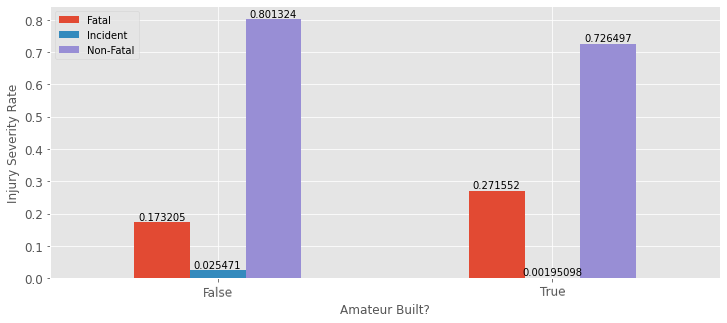

In [273]:
# Plot 
Rate_built=df[(df['Amateur.Built'].notna())&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))].groupby('Amateur.Built')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity')

#Rate_Amateur=df[(df['Amateur.Built']=='True')&~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable'))]['Injury.Severity'].value_counts(normalize=True)

ax=Rate_built.plot.bar(rot=1,stacked=False, figsize=(12,5),fontsize=12)
#ax.set_ylabel('Injury Severity Rate')
plt.ylabel('Injury Severity Rate')
plt.xlabel('Amateur Built?')
plt.legend(title=None)
for i in ax.containers:
    ax.bar_label(i)

In [288]:
# x_axis=np.arange(len(Rate_built))
# plt.figure(figsize=(12,5))
# ax=plt.bar(x_axis-0.2, Rate_built['Fatal'],width=0.2)
# plt.bar_label(ax)
# ax1=plt.bar(x_axis, Rate_built['Non-Fatal'],width=0.2)
# plt.bar_label(ax1)
# ax2=plt.bar(x_axis+0.2, Rate_built['Incident'] ,width=0.2)
# plt.bar_label(ax2)
# plt.xticks(x_axis, Rate_built.index, fontsize=12)
# plt.legend(['Fatal','Non-Fatal','Incident'])

## Observation 5:
In different phases of flight during the time the accidents/incidents happened, maneuvering can cause the highest fatality rate, which is over 39%, while taxing is only 1.9%.

Text(0.5, 0, 'Broad Phase of Flight (the time during the flight the accident happened)')

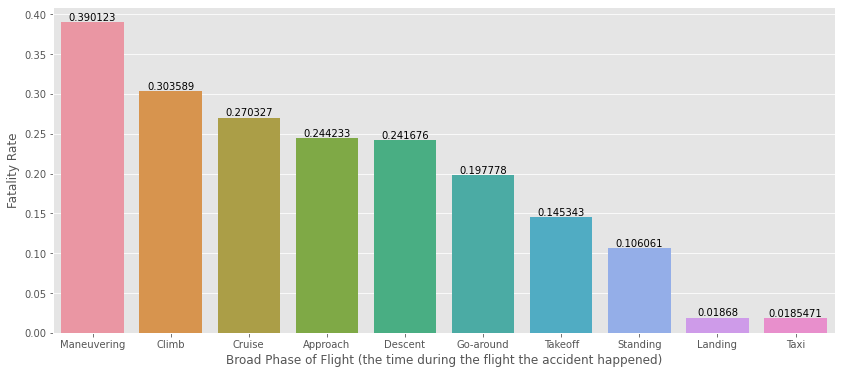

In [207]:
## Fatality's relations with engine numbers 

Rate_EngineNum=df[(df['Broad.phase.of.flight'].notna())&(~((df['Injury.Severity'].isna())|(df['Injury.Severity']=='Unavailable')))].groupby('Broad.phase.of.flight')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity')

# drop 'other' and 'unknown' items as the number of their samples are small (less than 1000)
Rate_EngineNum.drop(index=['Other','Unknown'], inplace=True)

# plot 
plt.figure(figsize=(14,6))
ax=sns.barplot(x=Rate_EngineNum.Fatal.sort_values(ascending=False).index, y=Rate_EngineNum.Fatal.sort_values(ascending=False).values)
#ax=Rate_EngineNum.Fatal.sort_values(ascending=False).plot(rot=1,kind='bar')

ax.bar_label(ax.containers[0])
ax.set_ylabel('Fatality Rate')
ax.set_xlabel('Broad Phase of Flight (the time during the flight the accident happened)')